In [45]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

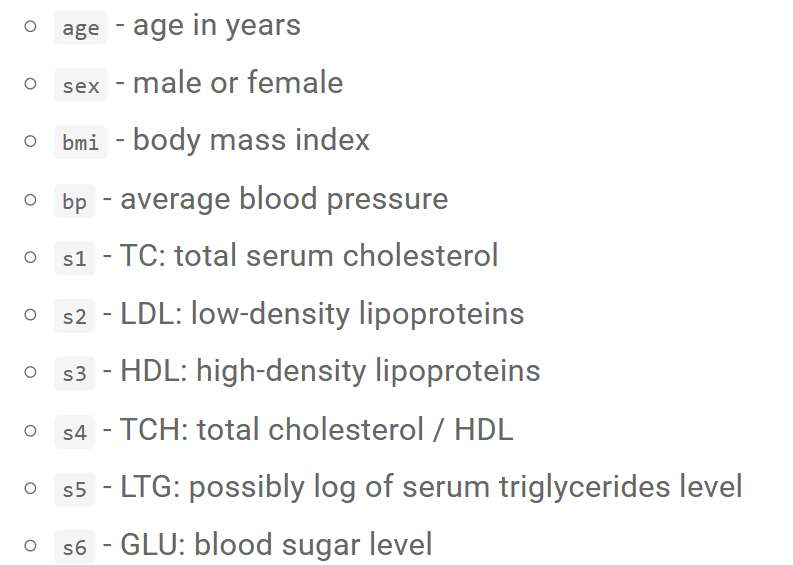

In [46]:
X, Y = datasets.load_diabetes(return_X_y = True, as_frame=True)
X = np.array(X)
y = np.array(Y)

In [47]:
lda = LinearDiscriminantAnalysis(n_components = 1)
x = lda.fit(X, y).transform(X).reshape(442)

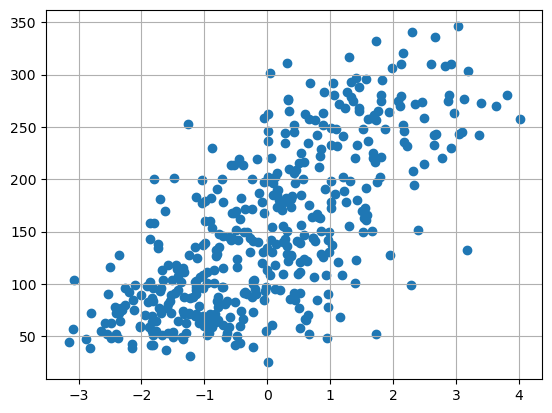

In [48]:
plt.scatter(x, y)
plt.grid()

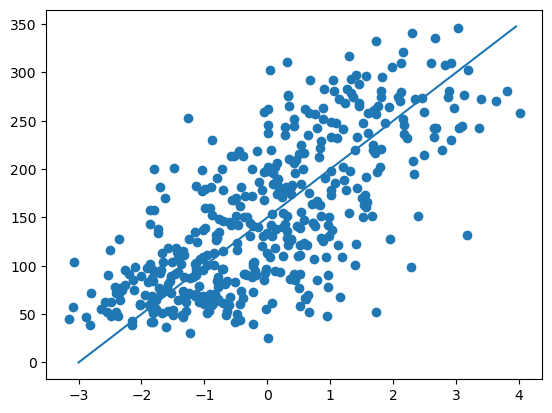

In [49]:
a0, b0 = 50, 150
xx = np.arange(-3, 4, 0.05)
plt.plot(xx, a0*xx + b0)
plt.scatter(x, y)

In [50]:
def MSE(y_test: np.ndarray, y_pred: np.ndarray):
    if len(y_test) != len(y_pred):
        print('Размеры массивов не совпадают, использовние MSE невозможно')
        return None
    else:
        mse = np.sum((y_test - y_pred)**2)/len(y_pred)
        return mse

def mse_diff_a(x, y_test, y_pred):
    if len(x) != len(y_test) or len(x) != len(y_pred) :
        print('Размеры массивов не совпадают, дифференцирование по a невозможно')
    else:
        d = (-2)/len(y_pred)*np.sum(x*(y_test - y_pred))
        return d

def mse_diff_b(y_test, y_pred):
    if len(y_test) != len(y_pred):
        print('Размеры массивов не совпадают, дифференцирование по b невозможно')
    else:
        d = (-2)/len(y_pred)*np.sum((y_test - y_pred))
        return d

In [51]:
eps = 0.1
def linear_regresion_mse(x, y, a0, b0, max_iter=50):
    a, b = a0, b0
    for i in range(1, max_iter+1):
        a_prev, b_prev = a, b
        a = a - eps * mse_diff_a(x, y, a_prev*x+b_prev)
        b = b - eps * mse_diff_b(y, a_prev*x+b_prev)
    return [a, b]

In [52]:
mse_model = linear_regresion_mse(x, y, 50, 150)
print(f'Коэффициенты модели с функцией потерь S_mse:\n a = {mse_model[0]}, b = {mse_model[1]} ')

Коэффициенты модели с функцией потерь S_mse:
 a = 37.83009235310178, b = 152.13345371279246 


In [53]:
def MAE(y_test: np.ndarray, y_pred: np.ndarray):
    if len(y_test) != len(y_pred):
        print('Размеры массивов не совпадают, использовние MAE невозможно')
        return None
    else:
        mae = np.sum(np.abs(y_test - y_pred))/len(y_pred)
        return mae

def mae_diff_a(x, y_test, y_pred):
    if len(x) != len(y_test) or len(x) != len(y_pred) :
        print('Размеры массивов не совпадают, дифференцирование по a невозможно')
    else:
        d = (-1)/len(y_pred)*np.sum(x*(y_test - y_pred)/np.abs(y_test - y_pred))
        return d

def mae_diff_b(y_test, y_pred):
    if len(y_test) != len(y_pred):
        print('Размеры массивов не совпадают, дифференцирование по b невозможно')
    else:
        d = (-1)/len(y_pred)*np.sum((y_test - y_pred)/np.abs(y_test - y_pred))
        return d

In [54]:
def linear_regresion_mae(x, y, a0, b0, max_iter=50):
    a, b = a0, b0
    for i in range(1, max_iter+1):
        a_prev, b_prev = a, b
        a = a - eps * mae_diff_a(x, y, a_prev*x+b_prev)
        b = b - eps * mae_diff_b(y, a_prev*x+b_prev)
    return [a, b]

In [55]:
mae_model = linear_regresion_mae(x, y, 50, 150)
print(f'Коэффициенты модели с функцией потерь S_mae:\n a = {mae_model[0]}, b = {mae_model[1]} ')

Коэффициенты модели с функцией потерь S_mae:
 a = 48.179742966971894, b = 150.27330316742047 


In [56]:
reg = LinearRegression().fit(x.reshape(-1, 1), y)
reg.score(x.reshape(-1, 1), y)
print(f'Коэффициенты модели из библиотеки:\n a = {reg.coef_[0]}, b = {reg.intercept_} ')

Коэффициенты модели из библиотеки:
 a = 37.83009235307317, b = 152.13348416289594 


Как мы видим, коэффициенты модели из библиотеки и собственной реализации совпадают с большой точностью. Поэтому нет смысла сравнивать их по метрикам качества. Однако "рукописная" модель больше подвержена переобучению, поскольку коэффициент eps задается вручную и при добавлении данных коэффициенты могут получаться менее точными.

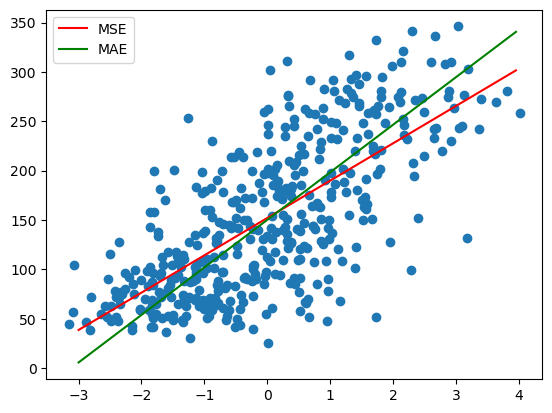

In [43]:
plt.scatter(x, y)
xx = np.arange(-3, 4, 0.05)
plt.plot(xx, mse_model[0]*xx + mse_model[1], color='red', label='MSE')
plt.plot(xx, mae_model[0]*xx + mae_model[1], color='green', label='MAE')
plt.legend()

Основные метрики качества:

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred_mse = mse_model[0]*x + mse_model[1]
r2_mse = r2_score(y, y_pred_mse)
msle = mean_squared_log_error(y, y_pred_mse)
mae = mean_absolute_error(y, y_pred_mse)
mse = mean_squared_error(y, y_pred_mse)
print(f'MSE: {mse}\nMAE {mae}\nR2: {r2_mse}\nMSLE: {msle}')

MSE: 2962.9038262388417
MAE 43.75503572003299
R2: 0.5003437878224941
MSLE: 0.17456674982976214


по значению R2 можем сказать, что уравнение объясняет только 50% дисперсии переменной y

# Задание 2

In [2]:
import json
import pandas as pd
import re

Загружаем спаршенные данные, удаляем совпадения, возникающие из-за коллабораций исполнителей друг с другом.

In [4]:
songs_from_json = []
with open("results_songs.json", "r", encoding="utf-8") as f:
    songs_json = json.load(f)
    for song in songs_json:

        songs_from_json.append([song['title'], song['lyrics'], song['genre']])
songs = pd.DataFrame(data = songs_from_json, columns = ['title', 'lyrics', 'genre'])
songs.drop_duplicates(inplace=True)
songs

,title,lyrics,genre
0,Пора возвращаться домой (Time To Go Home),[Текст песни «Пора возвращаться домой» ft. Oxx...,0
1,Полковнику никто не пишет (Nobody Writes to th...,[Текст песни «Полковнику никто не пишет»][Купл...,0
2,Чёрное солнце (Black sun),[Текст песни «Чёрное солнце»][Куплет 1]В багро...,0
3,Мой рок-н-ролл (My Rock & Roll),"[Текст песни «Мой рок-н-ролл»][Куплет 1]И то, ...",0
4,Варвара (Varvara),"[Текст песни «Варвара»][Интро]Ну, где ты, Варв...",0
...,...,...,...
1327,Hard 2 Kill,"*DJ Tape*[Бридж: Big Baby Tape]Baby Tape, я Ha...",3
1328,Broke Day,[Текст песни «Broke Day»][Интро: Big Baby Tape...,3
1329,Vampire Type Bitch,[Текст песни «Vampire Type Bitch» ft. Dope V][...,3
1330,Slip & Slide,[Текст песни «Slip & Slide»][Интро: kizaru & B...,3


In [5]:
songs_copy = songs

Подгружаем библиотеки и модули для обработки текстов 

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import spacy

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)
nlp = spacy.load("ru_core_news_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
def is_alpha_or_space(s):
        check = s.isdigit()
        if check:
            return False
        else:
            return True  
        
def add_spaces(s): #После парсинга в местах, где был перенос строки, слова склеиваются, но второе слово в паре пишется с 
    result = ''    #большой буквы, поэтому если перед большой буквой буква, вставляем туда пробел
    for i in range(len(s)):
        if i > 0 and s[i].isupper() and s[i-1].isalpha():
            result += ' '
        result += s[i]
    return result

def preprocess_and_lemmatize(text): #приводим к нижнему регистру, лемматизируем и удаляем стоп-слова и пунктуацию
    doc = nlp(text.lower())  
    lemmatized_words = [token.lemma_ for token in doc if token.text not in punctuation and token.text not in stop_words]
    return " ".join(lemmatized_words)
        
def remove_unnecessary(a):
    a = re.sub(r'\W+', ' ', a)
    a = add_spaces(a)
    a = preprocess_and_lemmatize(a)
    a = re.sub('\[.*?\]|(|)|куплет|припев|интро|текст песня','',a) #удаляем комментарии (в квадратных скобках) и ключевые слова
    a = ' '.join(word for word in a.split() if len(word)>2) #Удаляем короткие слова     
    a = ''.join(filter(is_alpha_or_space, a)) #удаляем все что не буква или пробел
    return a

In [8]:
processed_songs = pd.DataFrame(columns=['title', 'lyrics', 'genre'])
for i in songs.index:
    processed_songs.loc[ len(processed_songs.index )] = [songs['title'][i], remove_unnecessary(songs['lyrics'][i]), songs['genre'][i]]
processed_songs

,title,lyrics,genre
0,Пора возвращаться домой (Time To Go Home),пора возвращаться домой oxxxymiron лёва чёрный...,0
1,Полковнику никто не пишет (Nobody Writes to th...,полковник никто писать больший город пустой по...,0
2,Чёрное солнце (Black sun),чёрный солнце багровый тон расцвести паранойя ...,0
3,Мой рок-н-ролл (My Rock & Roll),рок ролл набело открыться рок ролл это цель ср...,0
4,Варвара (Varvara),варвар варвара ага угу грустный очень обычно в...,0
...,...,...,...
1254,Hard 2 Kill,tape бридж big baby tape baby tape hard kill j...,3
1255,Broke Day,broke day big baby tape prince это посвящаться...,3
1256,Vampire Type Bitch,vampire type bitch dope big baby tape dope это...,3
1257,Slip & Slide,slip slide kizaru big baby tape tape kizaru сн...,3


Создадем функцию перевода текста в вектор

In [7]:
def text_to_vec(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    result = []
    for vec in outputs.last_hidden_state[0].detach().numpy():
        result.extend(vec)
    return result

Создаем модель BERT для токенизации и перевода текста в векторное представление. Таких моделей много, эту мне посоветовал товарищ, работающий в сфере машинного перевода, так как она лучше стандартных работает с ру-англ текстами.

In [8]:
from transformers import AutoModel, AutoTokenizer
model_name = "DeepPavlov/rubert-base-cased"
model = AutoModel.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
vec_data = pd.DataFrame(columns=['title', 'lyrics_list', 'genre', 'len_lyrics_list'])
for i in processed_songs.index:
    lyrics_list = text_to_vec(processed_songs['lyrics'][i], model, tokenizer)
    vec_data.loc[ len(vec_data.index )] = [processed_songs['title'][i], lyrics_list, processed_songs['genre'][i], len(lyrics_list)]
vec_data

,title,lyrics_list,genre,len_lyrics_list
0,Пора возвращаться домой (Time To Go Home),"[0.024506219, -0.51342785, 0.18410261, 0.19250...",0,81408
1,Полковнику никто не пишет (Nobody Writes to th...,"[0.120870076, 0.04736653, -0.30408075, 0.25791...",0,44544
2,Чёрное солнце (Black sun),"[0.07190777, -0.45424116, 0.78712106, 0.158048...",0,92160
3,Мой рок-н-ролл (My Rock & Roll),"[0.59652454, -0.42408687, 0.25842777, 0.082915...",0,67584
4,Варвара (Varvara),"[0.35720193, -0.19375275, 0.18820545, 0.138461...",0,52992
...,...,...,...,...
1254,Hard 2 Kill,"[0.18347621, -0.095998615, -0.29078534, 0.0315...",3,195840
1255,Broke Day,"[0.11135418, -0.032637067, -0.24962208, 0.1140...",3,176640
1256,Vampire Type Bitch,"[-0.16536428, -0.0024926811, -0.12017614, 0.34...",3,107520
1257,Slip & Slide,"[0.13066307, -0.10608551, -0.18291137, 0.02541...",3,135168


Так как в k-means нужно подавать на вход векторы одинаковой длинны, надо обрезать все наши вектора до определенной длины. Мы могли бы обрезать тексты, но из-за специфичности работы BERT модели все равно получили бы вектора немного разной длины. Поэтому посмотрели на длину первых 60 векторов, в какой то момент рост длины перестал быть резким (до этого текста могли быть выбросами, так как на genius, откуда брались песни, в топе песен попадаются, например, справки о составе какого-то музыкального объединения), и вектора были обрезаны до этой длины. 

In [12]:
vec_data.copy().sort_values(by=['len_lyrics_list']).head(60)

,title,lyrics_list,genre,len_lyrics_list
306,Я буду там (I’ll be there),"[0.08293826, -0.37492406, -0.19709226, 0.19293...",0,13824
980,Состав объединения РНБ КЛУБ (List),"[0.38036197, -0.57658464, -0.0909408, 0.044509...",3,22272
34,Сердце (Heart),"[0.112260215, -0.18995513, 0.005450517, -0.160...",0,27648
276,снег идёт (it’s snowing),"[0.023504622, -0.154227, -0.032812774, 0.31893...",0,29952
833,Всё будет хорошо (Everything will be fine),"[0.028030552, -0.11486122, -0.25831673, 0.1223...",2,32256
36,Моя любовь (My love),"[-0.028980762, -0.1272408, 0.2362813, 0.136181...",0,34560
33,Она (She),"[-0.009326823, -0.17455438, -0.4374003, 0.0136...",0,35328
803,Зеленоглазое такси (Green-eyed taxi),"[0.04855402, -0.035702743, -0.015133679, 0.011...",2,35328
250,кто? (who?),"[0.2929347, -0.054358743, 0.10785183, 0.144054...",0,35328
914,Состав объединения MELON MUSIC (List),"[0.062108293, -0.36751267, 0.062399104, -0.150...",3,36096


In [14]:
vec_data = vec_data[vec_data['len_lyrics_list'] >= 47616]
vec_data.reset_index(drop=True, inplace=True)
vec_data['lyrics_list'] = vec_data['lyrics_list'].apply(lambda x: x[:vec_data['len_lyrics_list'].min()])
vec_data.drop('len_lyrics_list', axis=1, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1376\630237635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vec_data['lyrics_list'] = vec_data['lyrics_list'].apply(lambda x: x[:vec_data['len_lyrics_list'].min()])
C:\Users\Acer\AppData\Local\Temp\ipykernel_1376\630237635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vec_data.drop('len_lyrics_list', axis=1, inplace=True)


In [11]:
from sklearn.cluster import KMeans
from umap.umap_ import UMAP

Проводим кластеризацию полученных векторов

In [16]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit([x for x in vec_data['lyrics_list']])
clasters = kmeans.labels_
vec_data['class'] = clasters

C:\Users\Acer\AppData\Local\Temp\ipykernel_1376\2802796266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vec_data['class'] = clasters


In [17]:
vec_data

,title,lyrics_list,genre,class
0,Пора возвращаться домой (Time To Go Home),"[0.024506219, -0.51342785, 0.18410261, 0.19250...",0,2
1,Чёрное солнце (Black sun),"[0.07190777, -0.45424116, 0.78712106, 0.158048...",0,2
2,Мой рок-н-ролл (My Rock & Roll),"[0.59652454, -0.42408687, 0.25842777, 0.082915...",0,2
3,Варвара (Varvara),"[0.35720193, -0.19375275, 0.18820545, 0.138461...",0,2
4,Мой рок-н-ролл (My Rock’n’Roll) (Remix),"[0.26931223, -0.12386029, 0.07204771, 0.021331...",0,3
...,...,...,...,...
1197,Hard 2 Kill,"[0.18347621, -0.095998615, -0.29078534, 0.0315...",3,3
1198,Broke Day,"[0.11135418, -0.032637067, -0.24962208, 0.1140...",3,3
1199,Vampire Type Bitch,"[-0.16536428, -0.0024926811, -0.12017614, 0.34...",3,2
1200,Slip & Slide,"[0.13066307, -0.10608551, -0.18291137, 0.02541...",3,3


Напишем функции для проецирования наших длинных векторов на плоскость с помощью библиотеки UMAP и отображения точечного графика с подсвечиванием кластеров разными цветами

In [21]:
def umaping(vectors):
    umap_text = UMAP()
    umaped_vec = umap_text.fit_transform(vectors)
    return umaped_vec

In [22]:
def show_clusters_2d(vectors, k_means):
    if len(vectors[0]) > 2:
        umaped_vec = umaping(vectors)
    else:
        umaped_vec = vectors
    fig, ax = plt.subplots(1,1)
    ax.scatter(umaped_vec[:, 0], umaped_vec[:, 1], c=k_means.labels_)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.show()

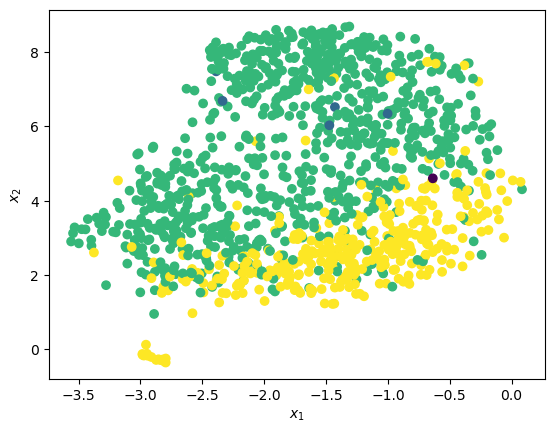

In [109]:
show_clusters_2d([x for x in vec_data['lyrics_list']], kmeans)

Как мы видим, кластеры смешанные, однако это может происходить в силу того, что кластеризировали мы исходные вектора, а отображаем проецированные. В процессе проецирования часть информации теряется и картинка получается не такой красивой, как хотелось бы

Напишем функцию для оценки точности кластеризации. Проблема заключается в том, что исходна кодировка жанров отличается от номеров полученных кластеров, поэтому сначала мы считаем, к какому жанру ближе среднее арифметическое номеров кластеров, находящихся в строке с реальным жанром i для каждого i от 0 до 3, потом перекодируем номера кластеров на номера соответствующих им (более близких) жанров и затем уже делим число правильно кластеризированных текстов на общее число текстов. То есть мы будем определять кластер как "рок", если наибольшее число песен, у которых настоящий жанр "рок", попали в этот кластер.

In [15]:
from sklearn.metrics import accuracy_score

In [27]:
def accuracy(data, clasters):
    cum_sum = 0
    classes_sum_real = {0:0, 1:0, 2:0, 3:0}
    
    for i in range(4):
        l = len(data[data["genre"]==i])
        cum_sum+=l
        classes_sum_real[i] = [l, cum_sum]
    classes_sum_pred = np.zeros(4)
    
    for i in range(len(clasters)):
        if i < classes_sum_real[0][1]:
            classes_sum_pred[0] += clasters[i]
        elif i < classes_sum_real[1][1]:
            classes_sum_pred[1] += clasters[i] 
        elif i < classes_sum_real[2][1]:
            classes_sum_pred[2] += clasters[i]
        elif i <= classes_sum_real[3][1]:
            classes_sum_pred[3] += clasters[i]
            
    for i in range(4):
        classes_sum_pred[i] = classes_sum_pred[i]/classes_sum_real[i][0]
        
    cluster_genre = np.zeros(4)
    
    for i in range(4):
        cluster_genre[i] = np.argmin(np.abs(classes_sum_pred - i))
    labels = clasters.copy()
    
    for i in range(len(labels)):
        labels[i] = cluster_genre[labels[i]]

    return accuracy_score(data['genre'].values, labels), labels

In [83]:
accuracy(vec_data, clasters)[0]

0.348585690515807

Как мы видим, при таком способе кластеризации и количестве кластеризируемых текстов, около трети всех тексов объединились в правильные группы. Это, конечно, не очень хороший результат, поэтому стоит попробовать другой метод

# Применение TF-IDF 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

Создадим TF-IDF матрицу для исследуемых текстов. TF измеряет важность слова в контексте отдельного теста, IDF - насколько уникально слово является по всей коллекции текстов, TF-IDF, соответственно, объединяет эти два понятия.

In [12]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in processed_songs['lyrics']])

Запустим алгоритм k-means используя полученную таблицу

In [13]:
num_clusters = 4
tf_idf_kmeans = KMeans(n_clusters=num_clusters, random_state=0)
tf_idf_kmeans.fit(tfidf_matrix)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

ВИзуализируем кластеры, полученные этим методом.

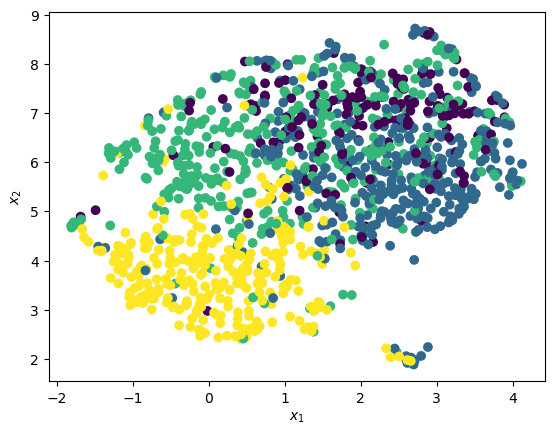

In [23]:
show_clusters_2d(tfidf_matrix.toarray(), tf_idf_kmeans)

Здесь уже видно более четкое разбиение на кластеры, что позволяет предположить большую точность такой модели. Проверим это с помощью написанной функции accuracy

In [30]:
accuracy(processed_songs, tf_idf_kmeans.labels_)[0]

0.6068308181096108

Как мы видим, точность действительно выше, уже близка к 2/3, что совсем неплохо для такого относительно небольшого набора текстов

Выведем примеры неправильного определения жанров

In [44]:
labels = accuracy(processed_songs, tf_idf_kmeans.labels_)[1]
genre = {0:'Рок', 1:'Олд-скул реп', 2:'Поп', 3:'Нью-скул реп'}
for i in range(0, len(processed_songs['genre'].values), 20):
    if processed_songs['genre'][i] != labels[i]:
        print(f"{processed_songs['title'][i]}")
        print(f"Настоящий жанр: {genre[processed_songs['genre'][i]]}\t определенный жанр: {genre[labels[i]]}\n")

Барышни (Young Ladies)
Настоящий жанр: Рок	 определенный жанр: Олд-скул реп

Выхода нет (No exit)
Настоящий жанр: Рок	 определенный жанр: Олд-скул реп

Энергия (Energy)
Настоящий жанр: Рок	 определенный жанр: Олд-скул реп

Мама-анархия (Mother Anarchy)
Настоящий жанр: Рок	 определенный жанр: Олд-скул реп

ромашки (chamomiles)
Настоящий жанр: Рок	 определенный жанр: Олд-скул реп

Парень молодой (Young Guy)
Настоящий жанр: Олд-скул реп	 определенный жанр: Нью-скул реп

Буквы (Letters)
Настоящий жанр: Олд-скул реп	 определенный жанр: Рок

Дрожь земли (Tremors of the earth)
Настоящий жанр: Олд-скул реп	 определенный жанр: Рок

Наше лето (Our Summer)
Настоящий жанр: Олд-скул реп	 определенный жанр: Рок

Судьба / Проклятый рэп (Destiny / Bloody Rap)
Настоящий жанр: Олд-скул реп	 определенный жанр: Рок

Я ночной хулиган (I’m a Night Bully)
Настоящий жанр: Поп	 определенный жанр: Рок

РОЛЕКС (ROLEX)
Настоящий жанр: Поп	 определенный жанр: Нью-скул реп

Голос (Voice)
Настоящий жанр: Поп	 опреде

# Сначала спроецируем на плоскость, потом кластеризуем

В обоих рассмотренных выше моделях при в целом нормальной точности мы не увидели никакой красоты на графиках. Разумеется, чем модель точнее, тем лучше, но при презентации своей работы начальству или заказчику хорошо бы показать картинку с четкими кластерами. Этого можно добиться, если сначала спроецировать векторы на плоскость, а потом уже применять кластеризацию к получившимся двумерным векторам

In [105]:
projected_vectors = umaping([x for x in vec_data['lyrics_list']])

In [106]:
projected_kmeans = KMeans(n_clusters=num_clusters, random_state=0)
projected_kmeans.fit(projected_vectors)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

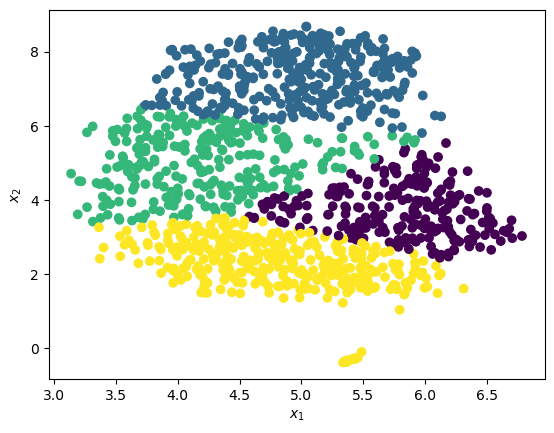

In [110]:
show_clusters_2d(projected_vectors, projected_kmeans)

И вот мы видим красивую картинку с четкими визуально равными по размеру кластерами. Проверим точность такой модели:

In [111]:
accuracy(vec_data, projected_kmeans.labels_)

0.3502495840266223

Оказалось, что точность этой модели на наших данных даже чуть выше, чем у первой. Однако в общем случае при проецировании все равно теряется часть информации, поэтому для более точных моделей стоит строить кластеризацию по начальным векторам

# Выводы


В ходе исследования лучшая полученная модель дала точность 60%. Вероятно, используя какие-то еще методы, другую обработку данных или взяв не 1300 песен, а в разы больше, можно было бы добиться большей точности. Когда мы выводили настоящий жанр песни и жанр, к которому с большей вероятностью относится кластер этой песни, то увидели, что рок и олд-скульный реп очень часто меняются местами (до смешного, когда песню Земфиры 'Ромашки' отнесли в кластер наиболее близкий к старому репу), тексты поп и рок песен тоже, по всей видимости, похожи. С другой стороны, можно предположить что реальная точность наших кластеризаторов даже чуть выше, поскольку песни в исходном датасете распределялись по жанру в соответствии с тем жанром, в котором привычно видеть исполнителя, однако артисты могут выступать в разных жанрах. Например, песню 'РОЛЕКС' Филиппа Киркорова никак нельзя отнести к жанру поп, с которым мы его обычно ассоциируем, а кластеризатор определил ее в кластер, где преобладают нью-скульные реп треки.

Таким образом, можно сделать вывод, что на основе одного только текста точно определять жанр сложно. Послушав Маму-анархию никто в здравом уме не скажет, что это реп, хотя содержание и ключевые слова могут быть похожими на творчество каких-нибудь андерграундных реп-исполнителей. Так что для точной кластеризации или классификации песен необходимо анализировать и музыкальную составляющую тоже.